# <font style='color:red'>Riduzione della dimensionalità (CAP. VI) </font>

#### Passi preliminari<br></br>
<font style='color:#0000FF'>
    <ul>° Caricamento</ul> 
    <ul>° Partizionamento</ul>
    <ul>° Standardizzazione dei dati</ul>  
</font>
<b>Espandi sopra per visualizzare ed eseguire</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color Intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]
from sklearn.model_selection import train_test_split
'''Considero le features da 1 a 13 e le associo alla variabile "X", 
le class label le assegno alla variabile "y", cioè la sola colonna 0'''

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

In [2]:
'''STANDARD SCALING: ci permette di standardizzare'''
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### <font style='color:red'>Tecniche principali di riduzione della dimensionalità</font>


+ **PCA** per riduzione dei dati in forma **non supervisionata**
+ **LDA** per riduzione dei dati in forma **supervisionata**, che permette di massimizzare la separabilità fra le classiù
+ **KPCA** per riduzione non lineare della dimensionalità via kernel

**N.B.** La *feature selection* **(es. algoritmo SBS)** mantiene le features **originali**, ma **non consente** di proiettare i dati in un nuovo spazio delle features, mantenendo quelle originali.

La *feature extraction* ci permette sia di garantire una maggiore efficienza in termini computazionali, sia di migliorare la **performance predittiva**, riducendo la dimensionalità.
Dunque, la *feature extraction* proietta i dati in un nuovo spazio delle features.

### <font style="color:red"> Principal Component Analysis </font>

+ E' una tecnica **unsupervised**. La **PCA** ci permette di identificare patterns nei dati, basandosi sulla correlazione tra features. 
+ La **PCA** ci permette di trovare la direzione di massima varianza in un insieme di dati con alta dimensionalità e di proiettare tali dati in un **nuovo sottospazio**, contenente le stesse o inferiori dimensioni dello spazio originale.
+ Gli **assi ortogonali**, ovvero i **componenti principali** dei nuovi sottospazi possono essere interpretati come le direzioni di massima varianza. I nuovi assi delle features sono **ortogonali** a tutti gli altri. 

+ Se utilizziamo la **PCA**, costruiamo la matrice di trasformazione **W** che ha dimensioni **d x k**, mappando il vettore **x** degli esempi di training in un nuovo sottospazio k-dimensionale di features 

### <font style='color:darkgreen'>Step della PCA</font>
1. Standardizzazione dei dati
2. Costruzione della matrice di covarianza
3. Calcolo autovalori e autovettori della matrice di covarianza
4. Ordinamento degli autovalori in ordine decrescente per classificare  gli autovettori
5. Seleziono i **k** autovettori che corrispondono ai **k** più grandi autovalori, dove **k** è la dimensionalità del nuovo sottospazio delle features **(k <= d)**
6. Costruisco la matrice **W** di proiezione a partire dai "top" k autovettori
7. Trasformo il dataset d-dimensionale di input (**X**), utilizzando la matrice di proiezione **W** al fine di ottenere il nuovo sottospazio di features k-dimensionale

## <font style="color:darkblue"> Principal component analysis in scikit-learn

+ La **PCA** in scikit-learn la troviamo implementata in una classe
+ Per prima cosa **addestriamo il modello**, utilizzando i dati di training, prima di trasformare sia i dati di training sia di test usando gli stessi parametri

Utilizziamo la classe PCA sul dataset di training "WINE", classifichiamo gli esempi trasformati con la REGRESSIONE LOGISTICA e visualizziamo le regioni di decisione tramite la funzione *plot_decision_region* 


#### <font style='color:darkred'>Ora andiamo a lavorare con PCA e Regressione Logistica</font>

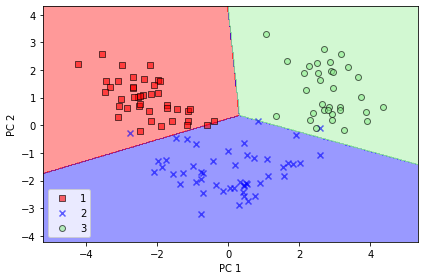

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import plot_decision as pd
#inizializzazione della PCA e della regressione logistica
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

#ora vado ad operare la riduzione della dimensionalità
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#apprendimento del modello LR con il dataset ridotto(PCA)
lr.fit(X_train_pca, y_train)
pd.plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#ciò che visualizzo è sui dati di training

#### Adesso devo vedere se il mio modello è in grado di separare correttamente le classi e per farlo, faccio un test sulla parte di test (che avevo splittato)

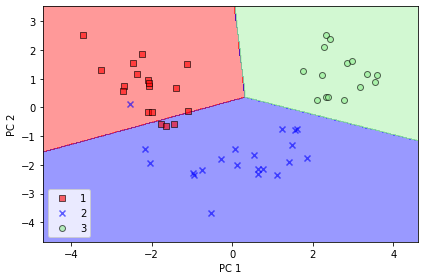

In [5]:
pd.plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#Solo alcuni esempi del test sono classificari male,
#tutto sommato è un buon classificatore

In [6]:
#In questo modo, vado a vedere quali componenti principali 
#sono più rilevanti, mostrando gli scores del rapporto di varianza 
#di ogni componente principale, possiamo notare che i primi due sono
#quelli più rilevanti
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])